In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [51]:
df = pd.read_csv('survey lung cancer.csv')

In [52]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [53]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [54]:
df.duplicated().sum()

33

In [55]:
df.shape

(309, 16)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Cleaning 

In [19]:
df = df.drop_duplicates()

In [61]:
df['GENDER'] = df['GENDER'].map({'M':0 , 'F' :1})

In [62]:
df['LUNG_CANCER']= df['LUNG_CANCER'].map({'YES':1 , 'NO':0})

# Visulazation

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

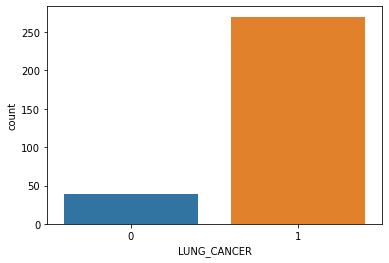

In [273]:
sns.countplot(x= df['LUNG_CANCER'])

<AxesSubplot:xlabel='GENDER', ylabel='count'>

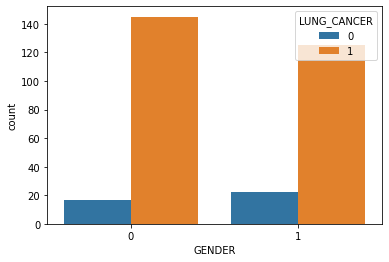

In [274]:
sns.countplot(x = df['GENDER'] ,hue=df['LUNG_CANCER'])

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

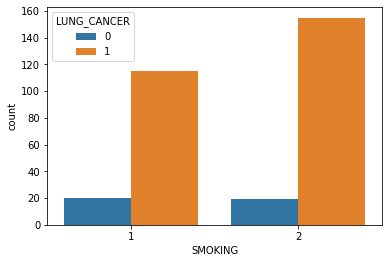

In [275]:
sns.countplot(x= df['SMOKING'],hue=df['LUNG_CANCER'])

<AxesSubplot:xlabel='AGE'>

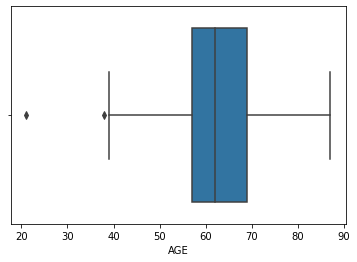

In [276]:
sns.boxplot(x = df['AGE'] )

<AxesSubplot:>

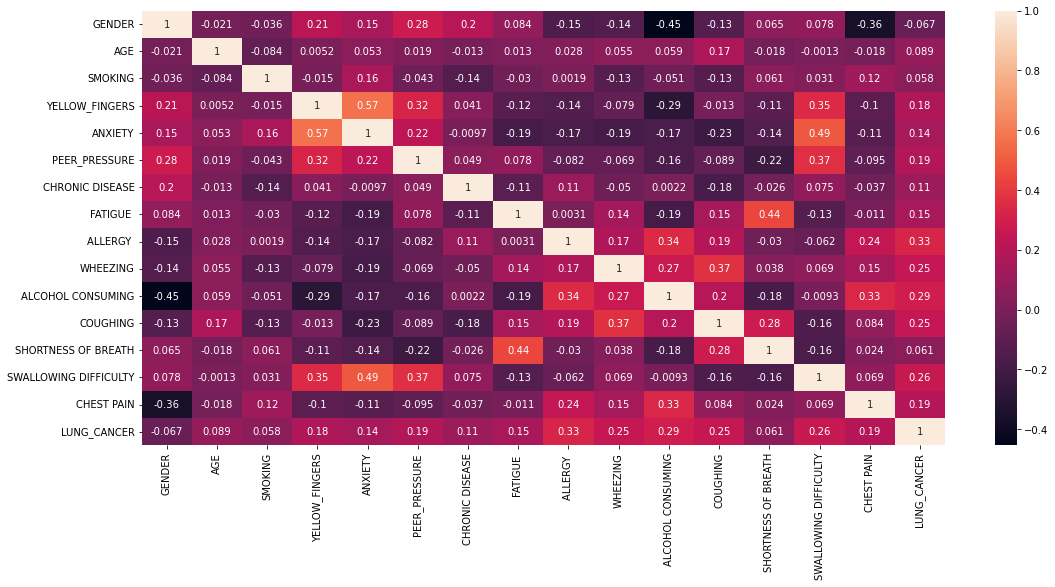

In [63]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr() , annot=True)

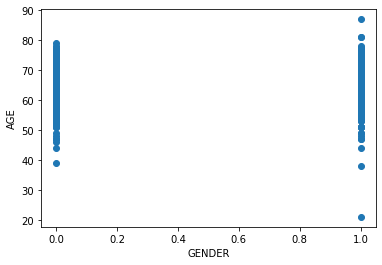

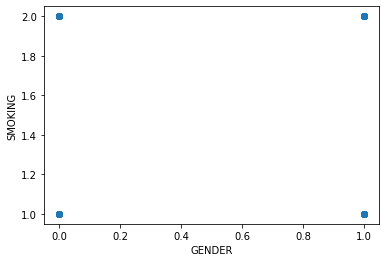

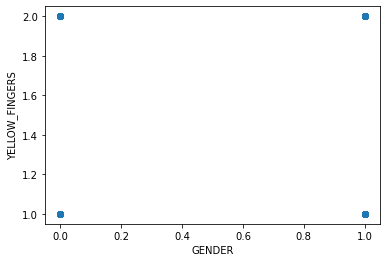

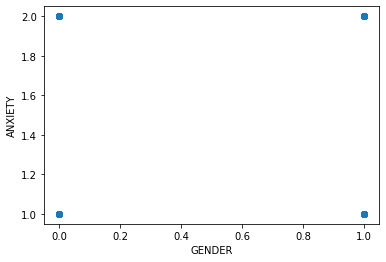

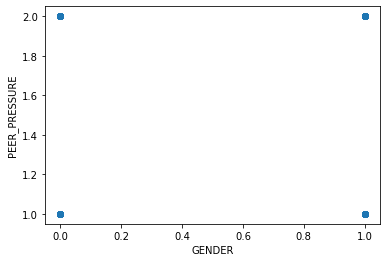

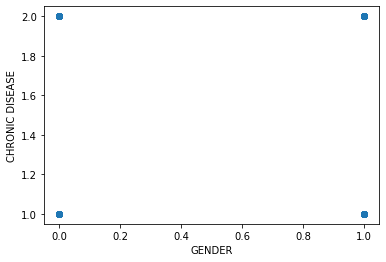

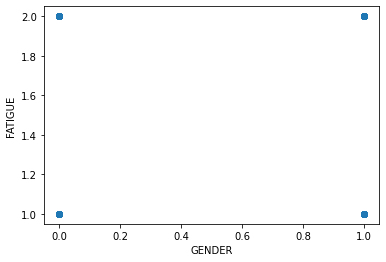

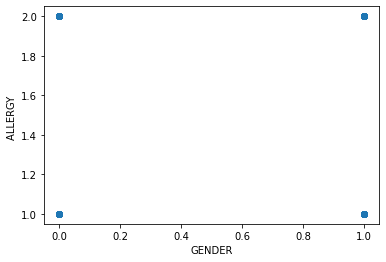

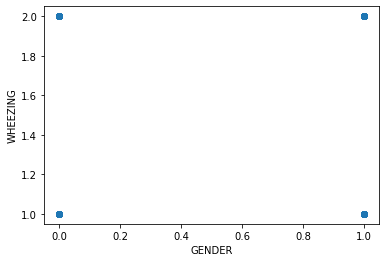

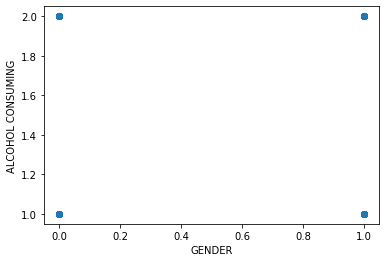

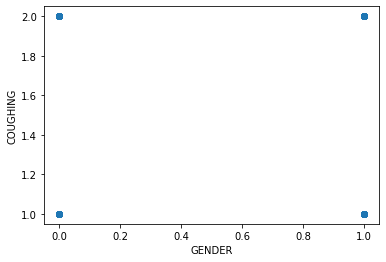

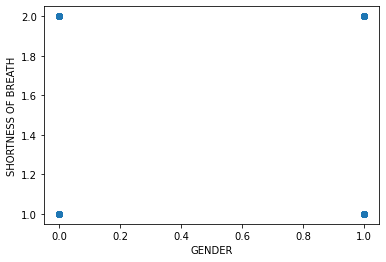

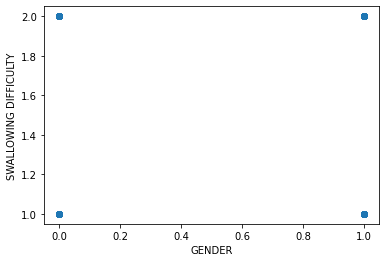

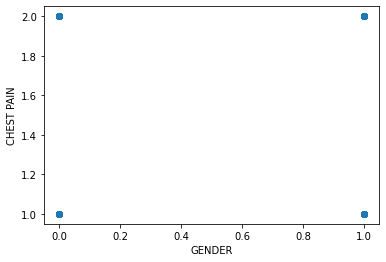

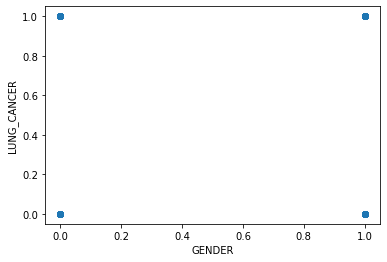

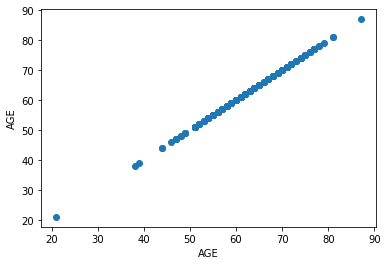

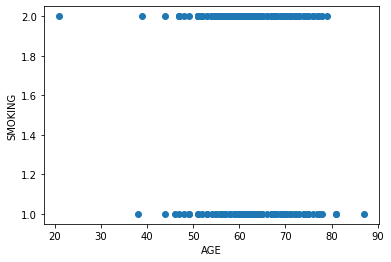

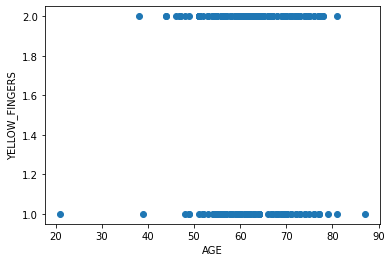

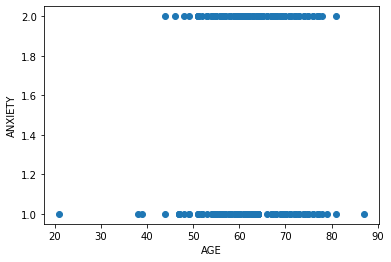

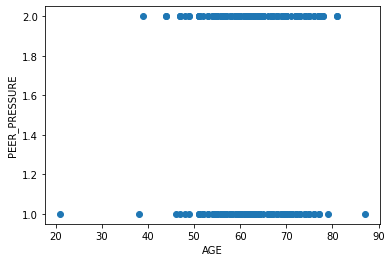

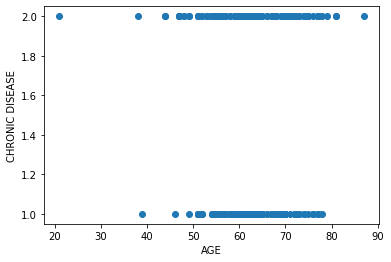

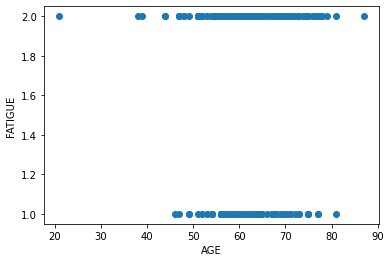

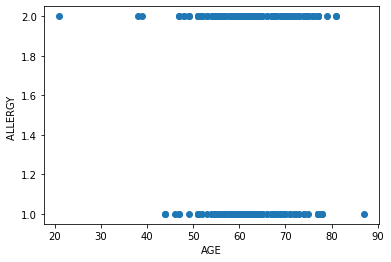

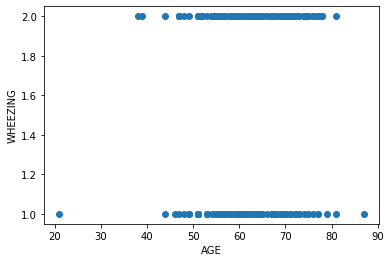

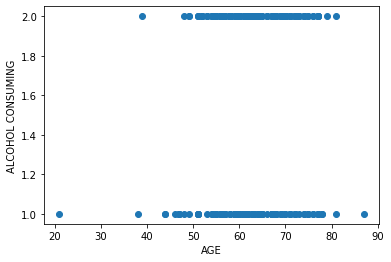

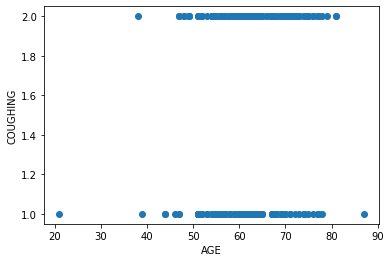

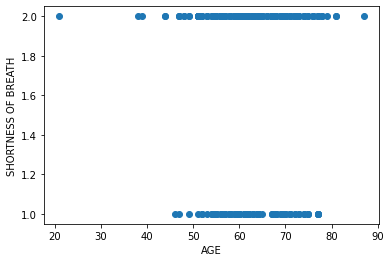

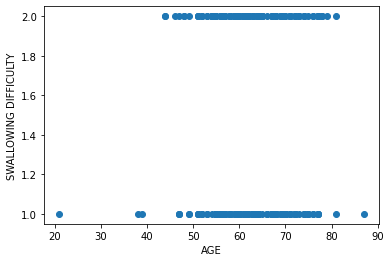

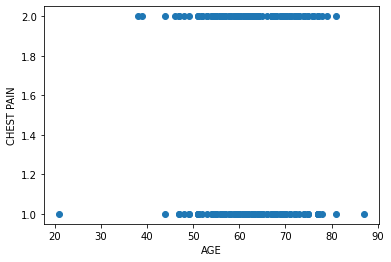

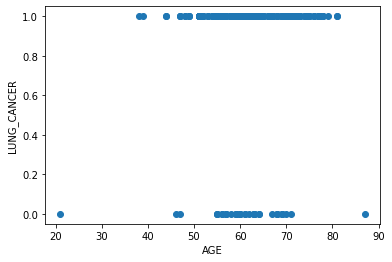

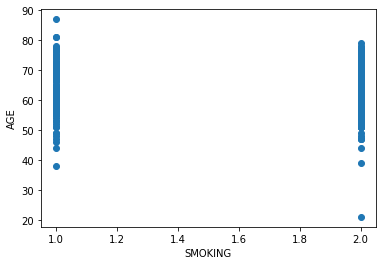

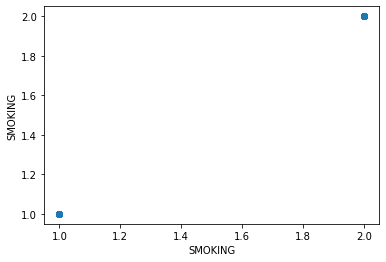

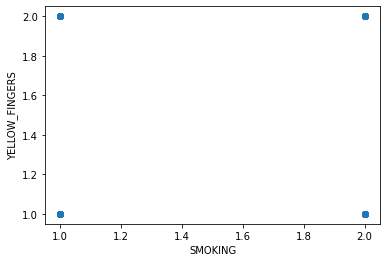

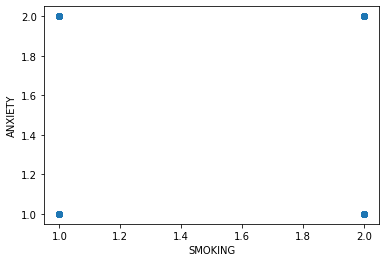

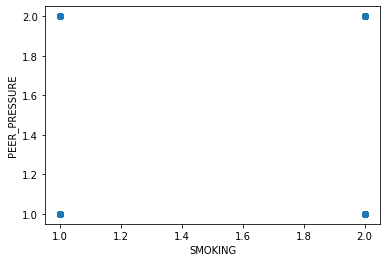

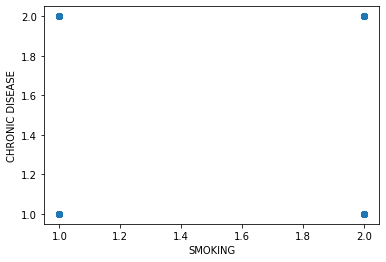

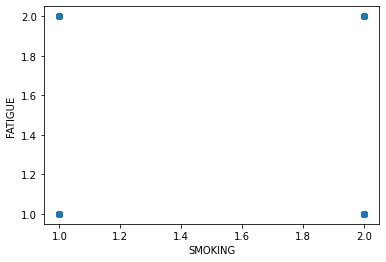

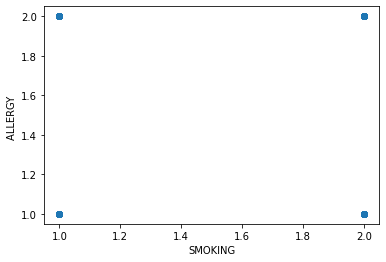

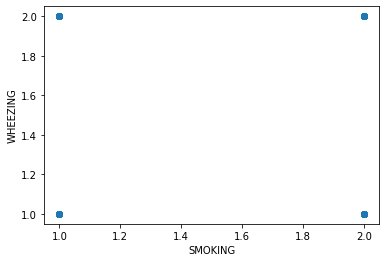

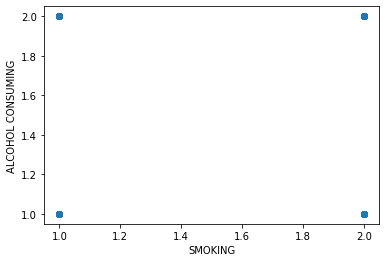

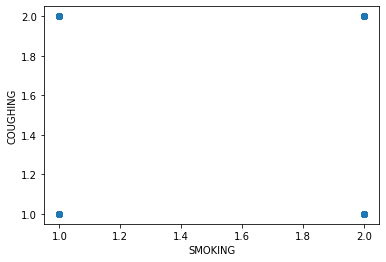

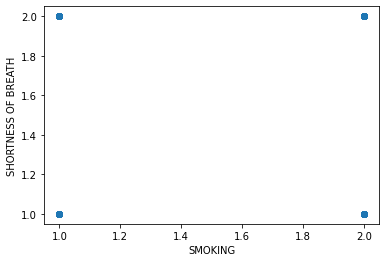

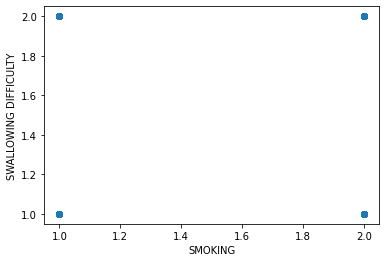

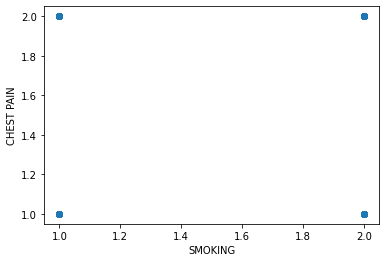

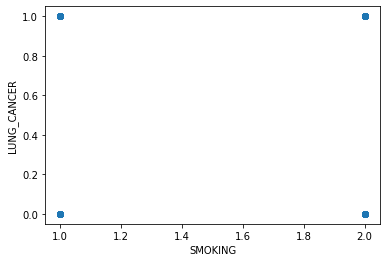

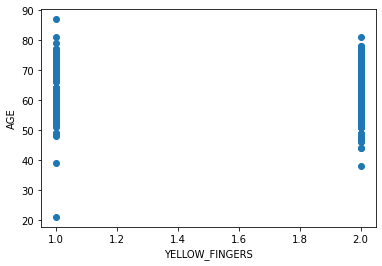

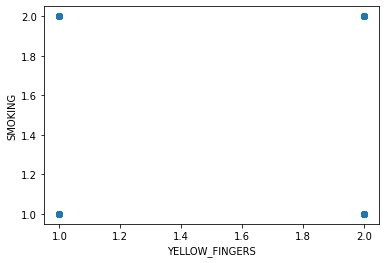

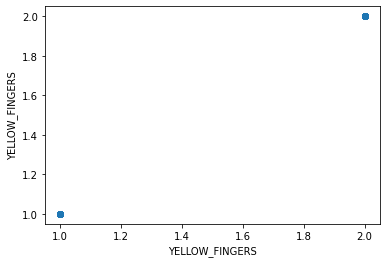

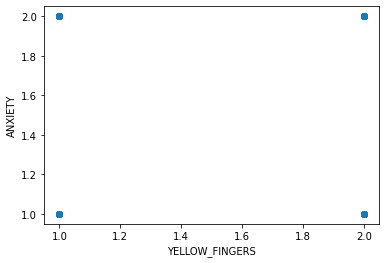

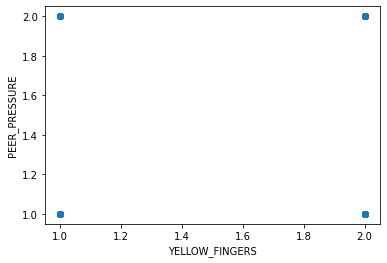

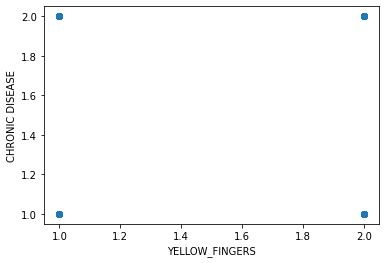

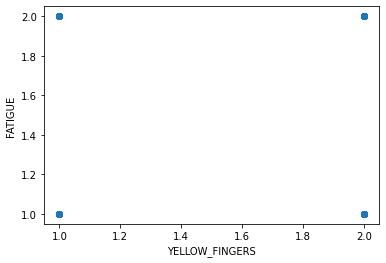

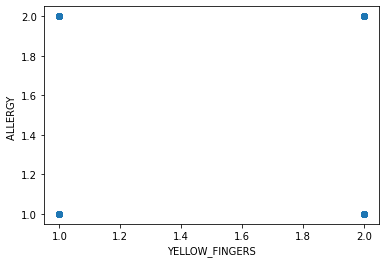

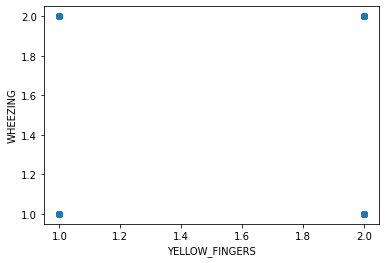

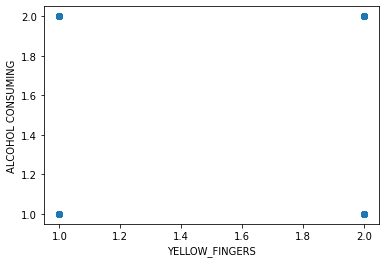

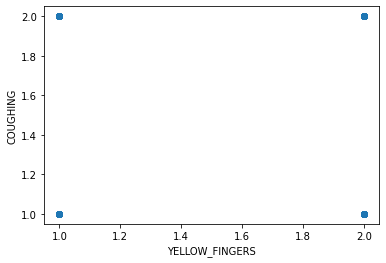

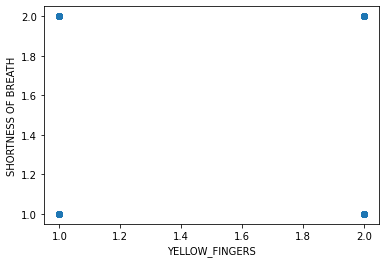

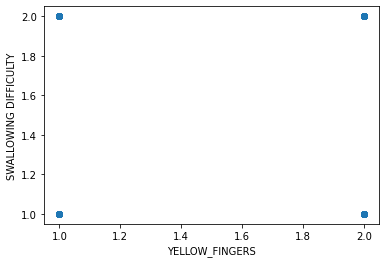

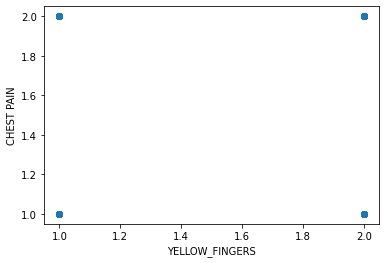

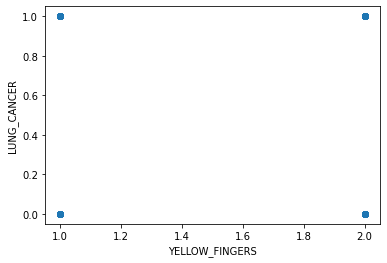

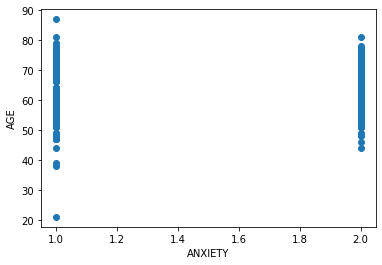

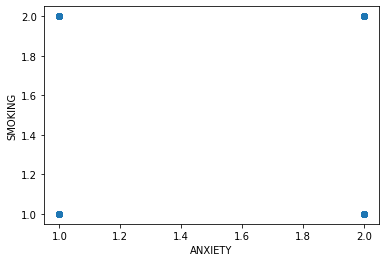

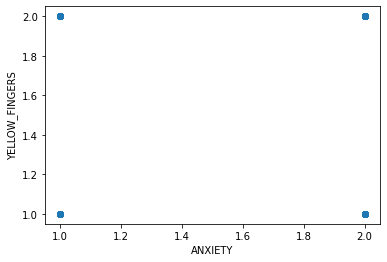

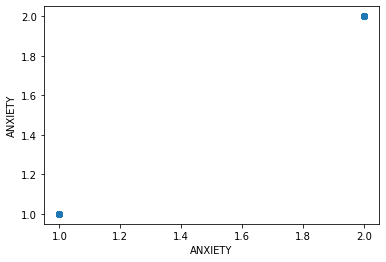

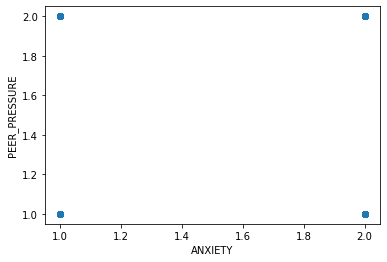

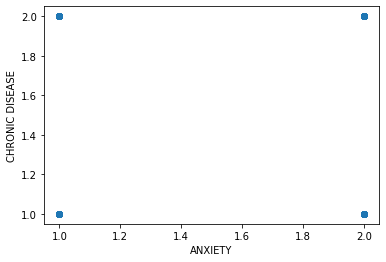

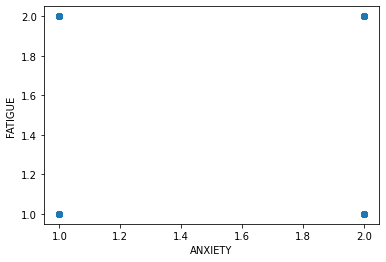

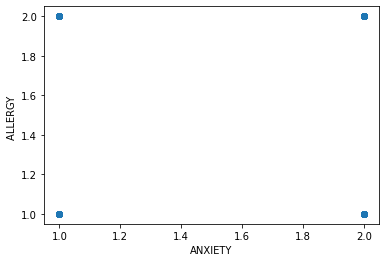

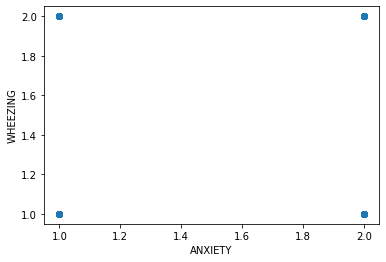

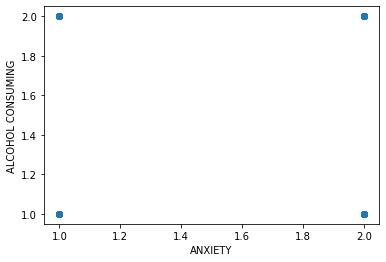

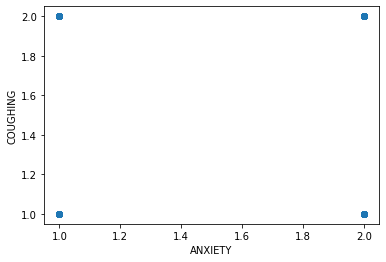

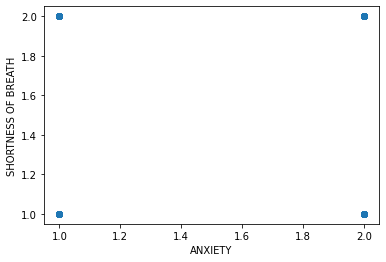

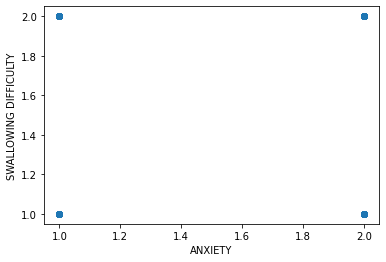

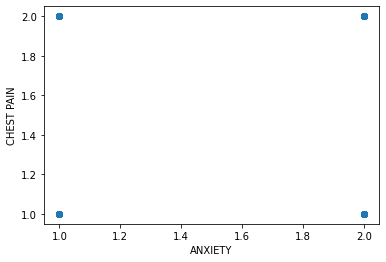

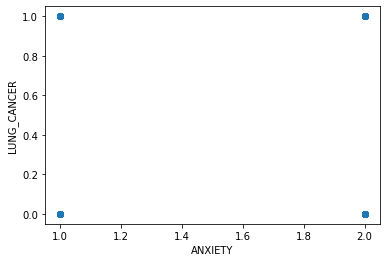

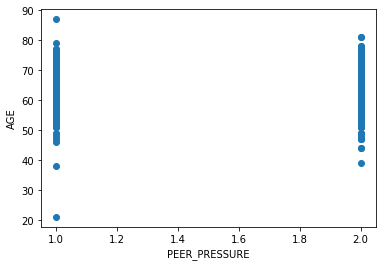

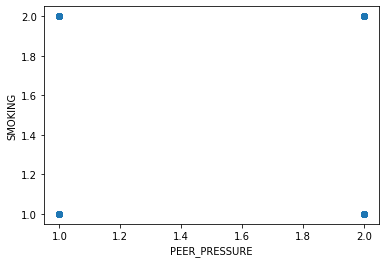

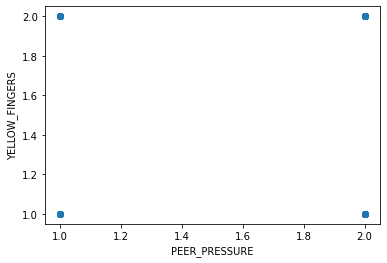

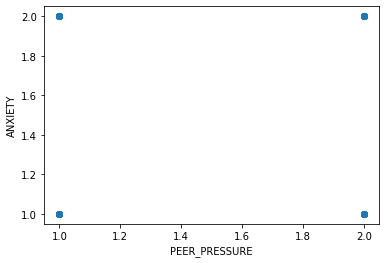

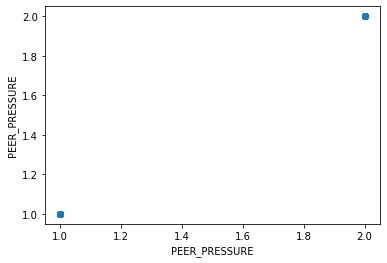

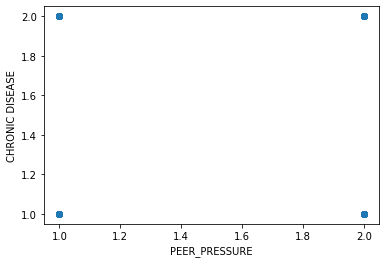

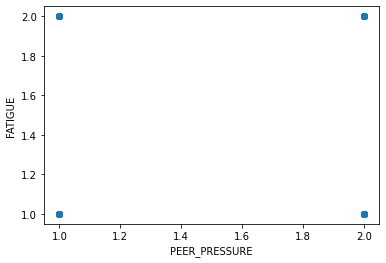

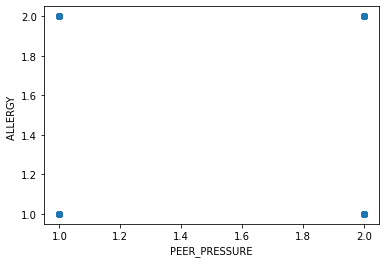

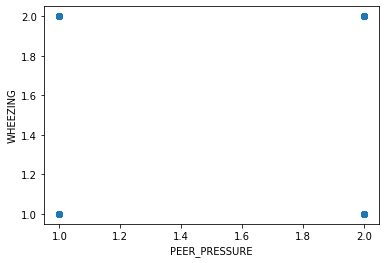

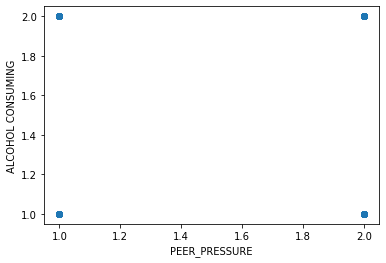

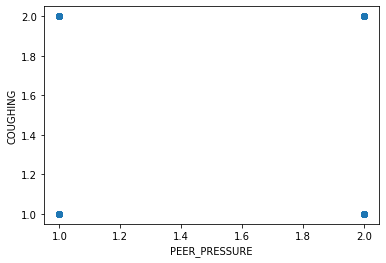

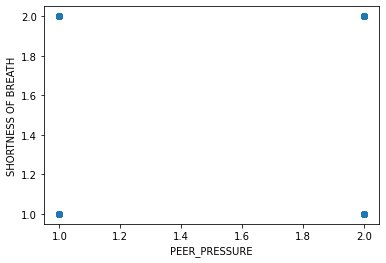

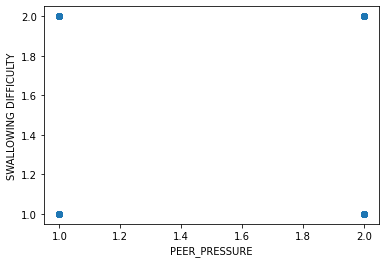

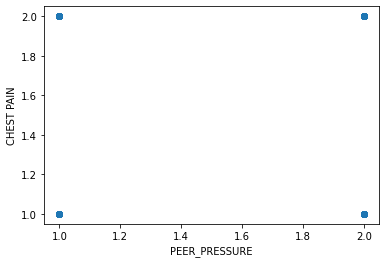

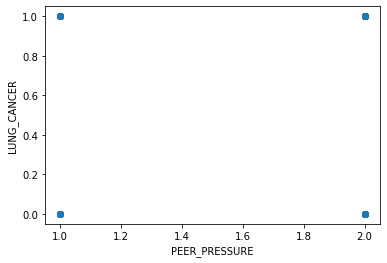

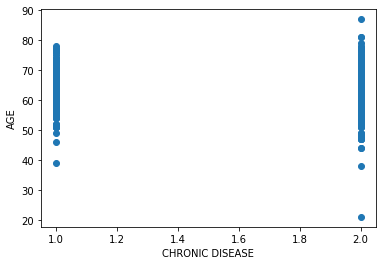

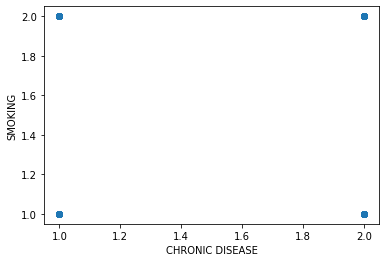

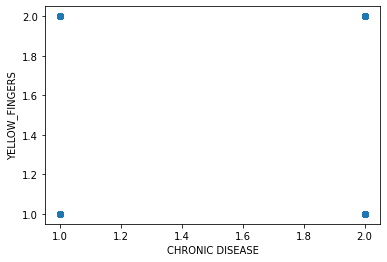

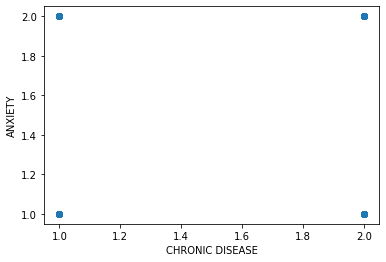

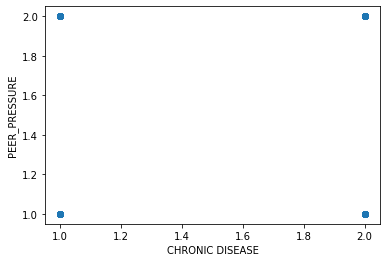

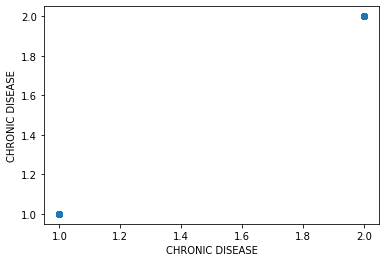

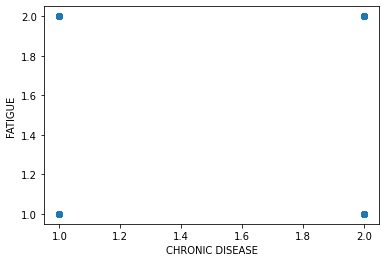

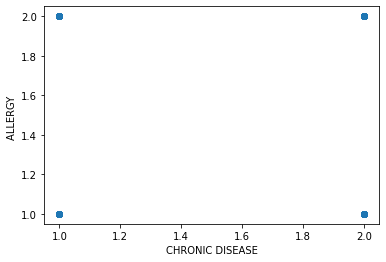

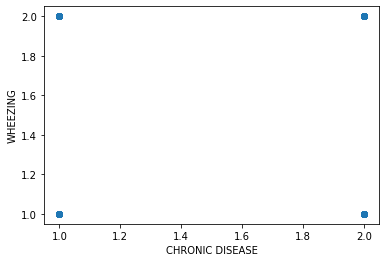

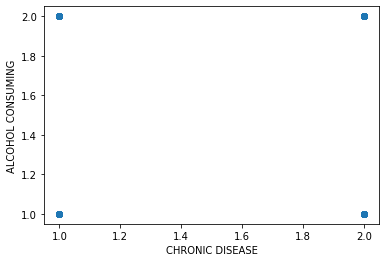

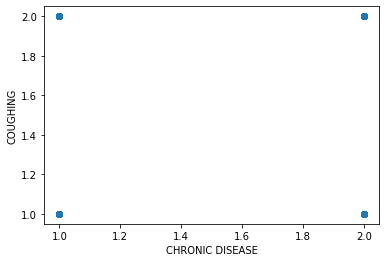

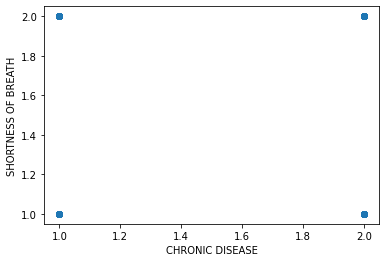

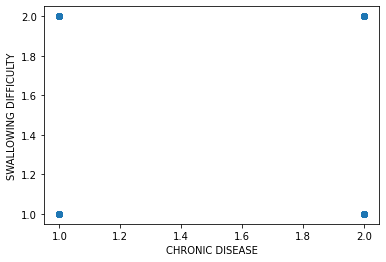

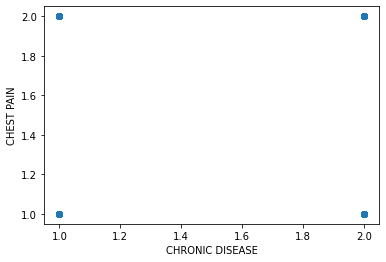

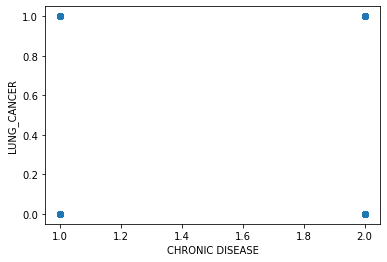

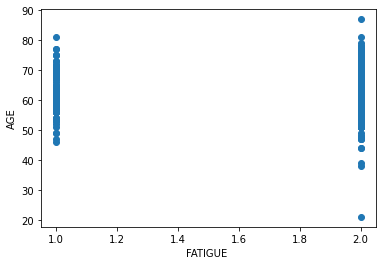

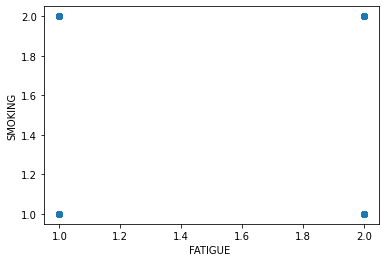

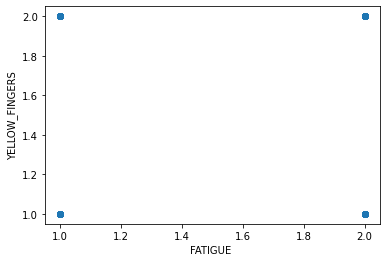

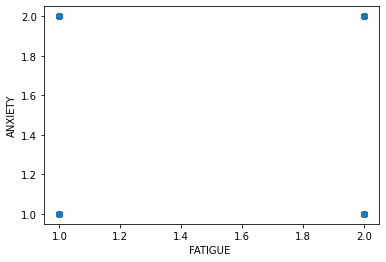

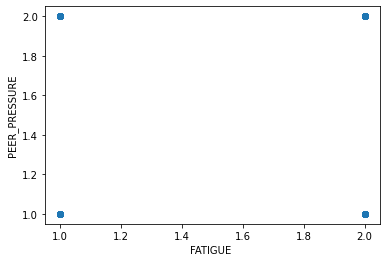

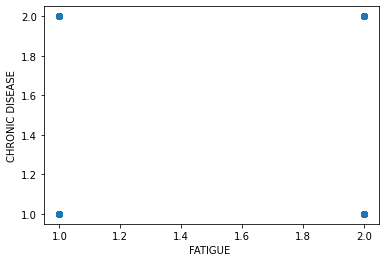

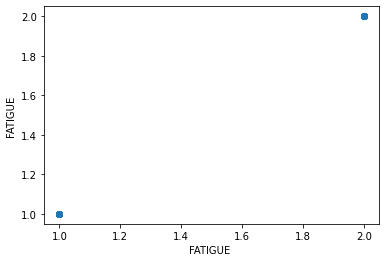

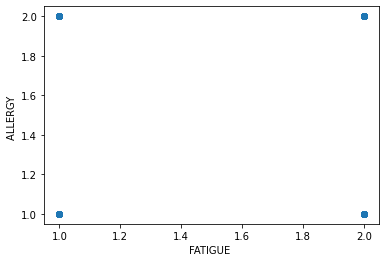

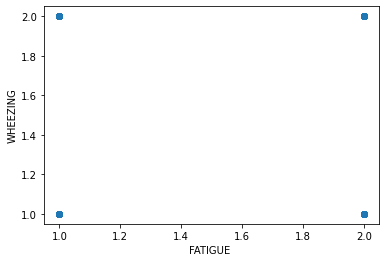

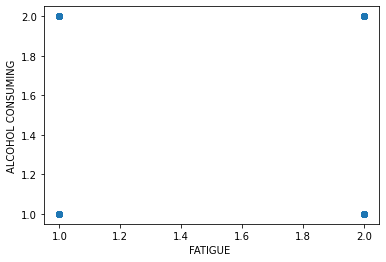

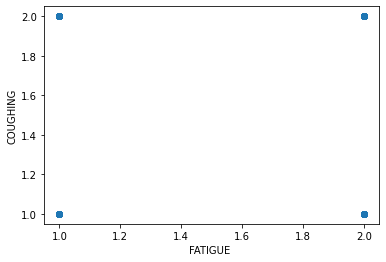

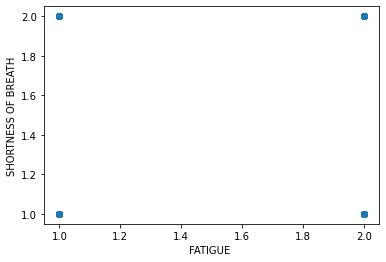

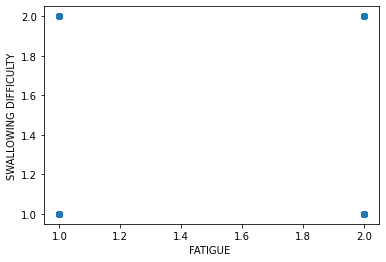

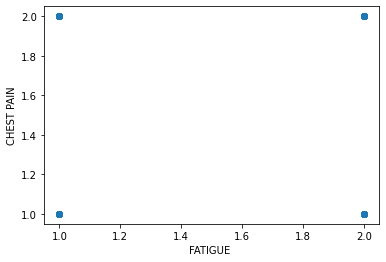

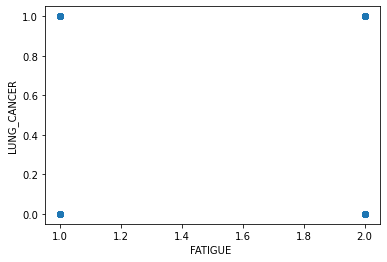

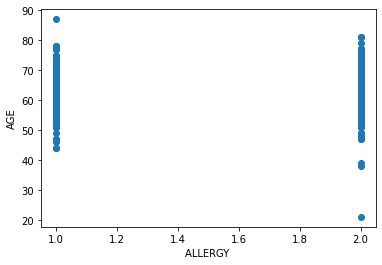

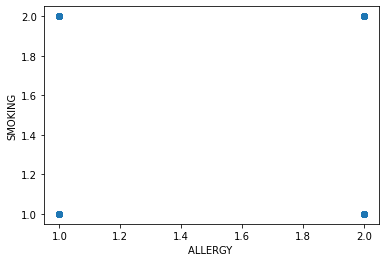

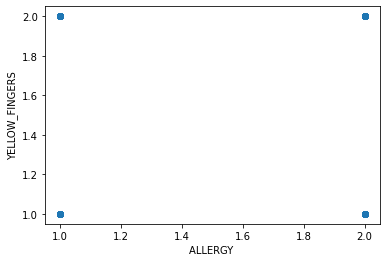

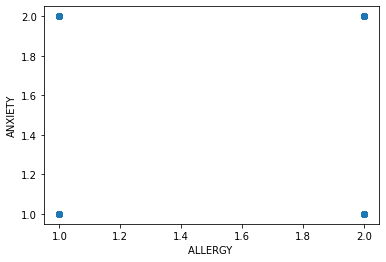

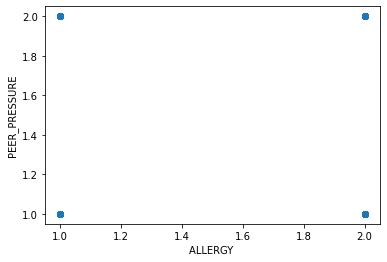

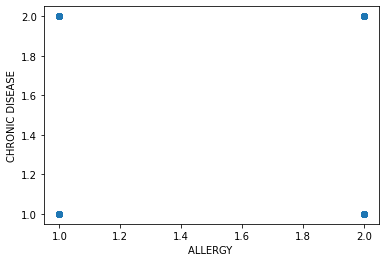

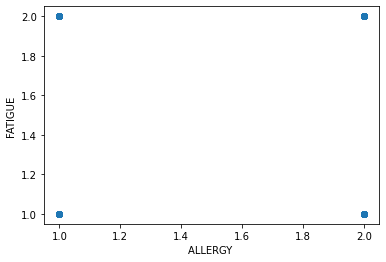

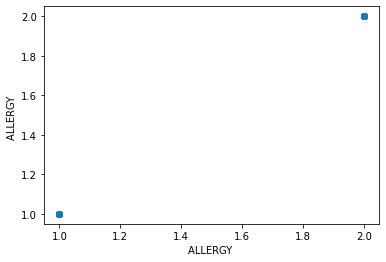

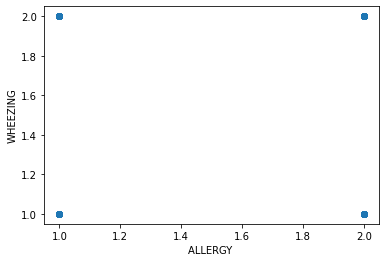

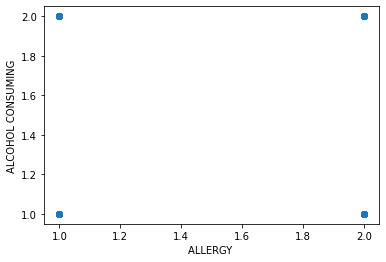

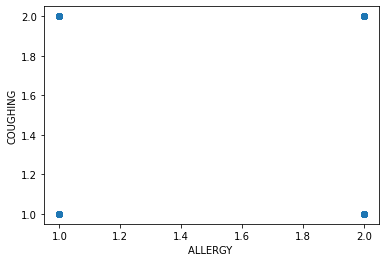

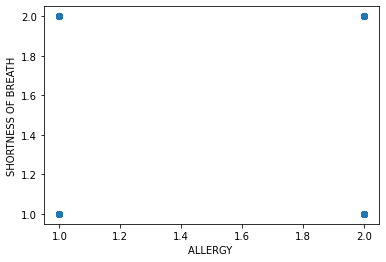

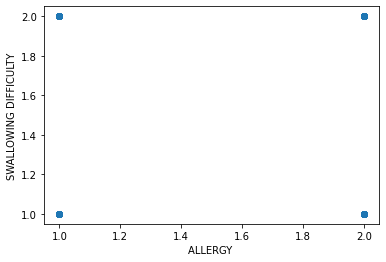

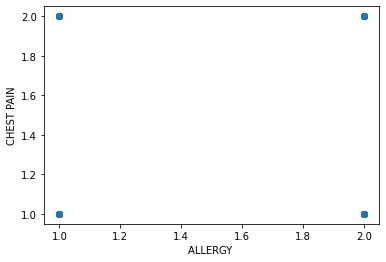

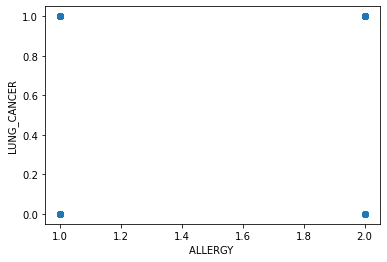

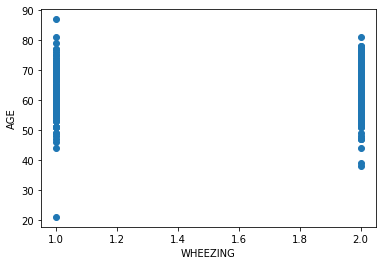

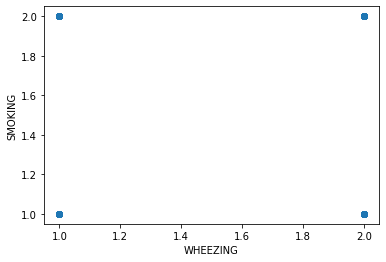

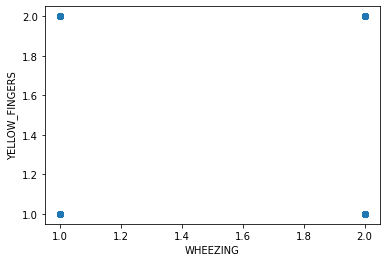

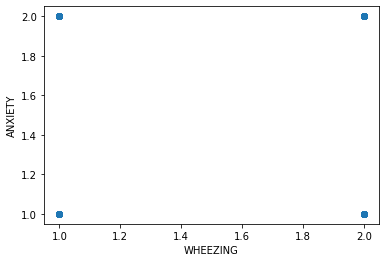

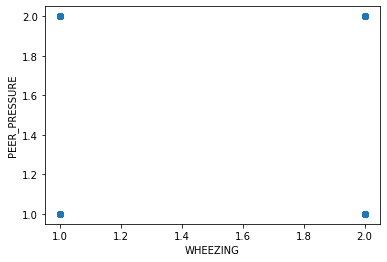

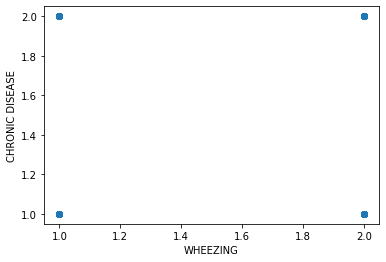

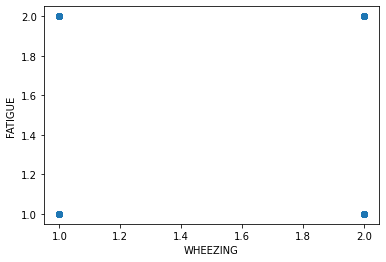

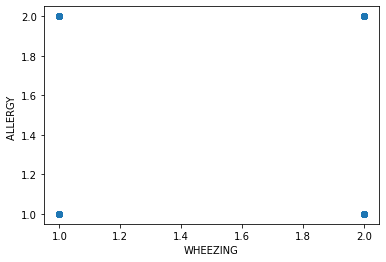

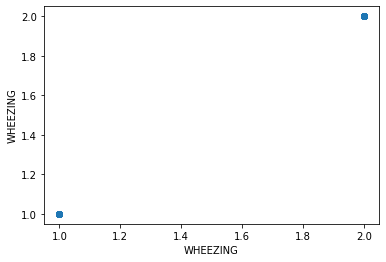

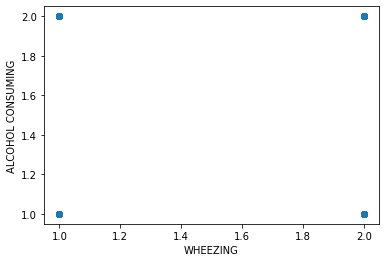

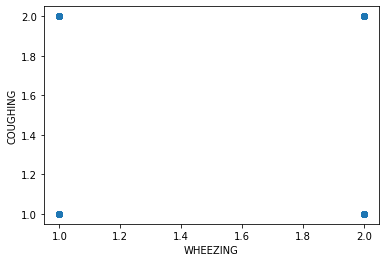

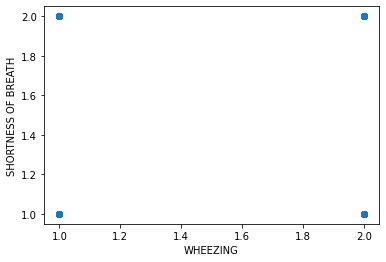

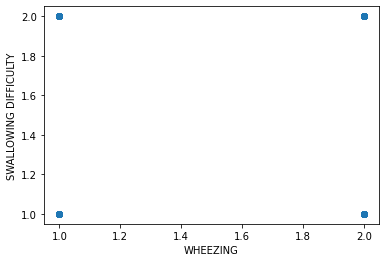

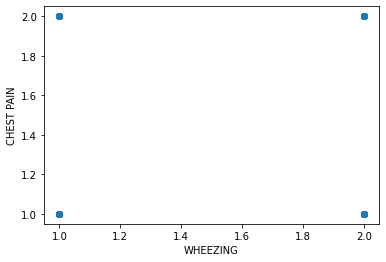

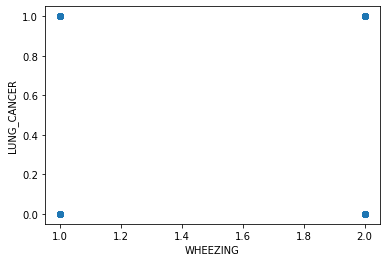

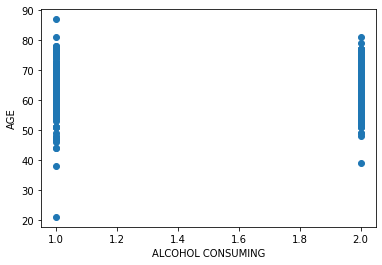

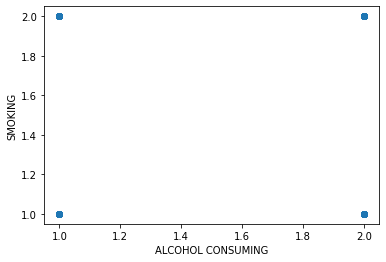

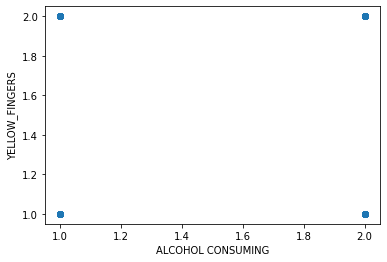

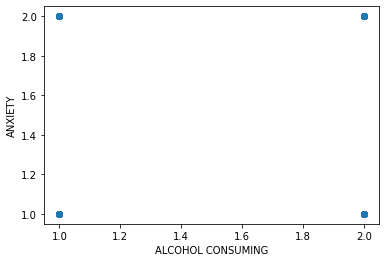

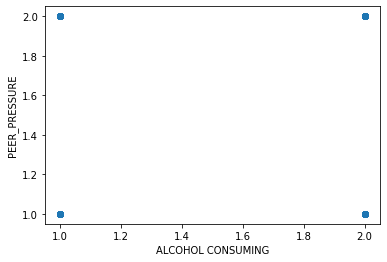

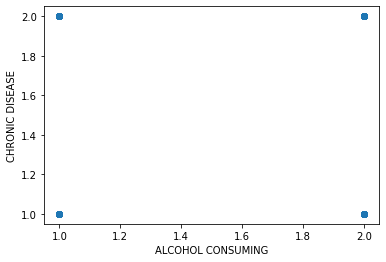

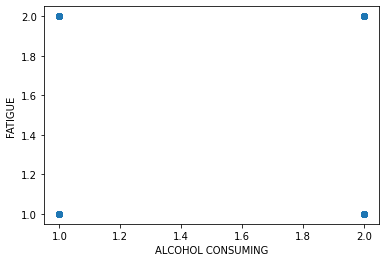

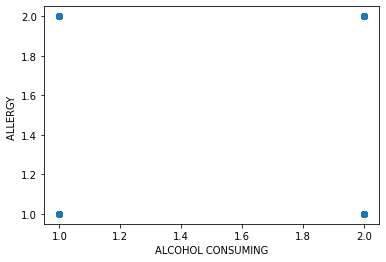

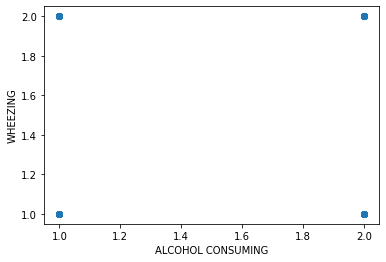

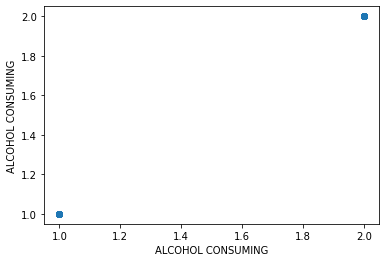

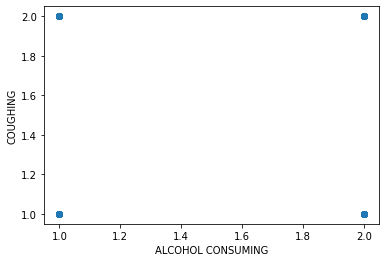

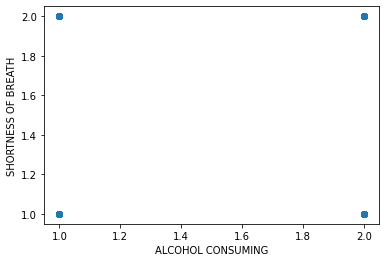

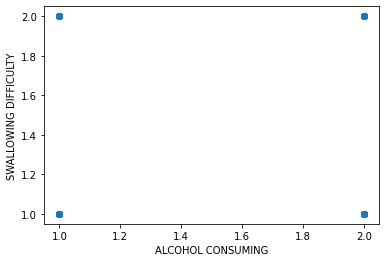

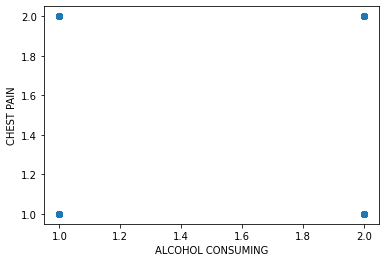

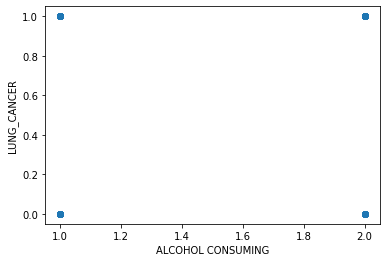

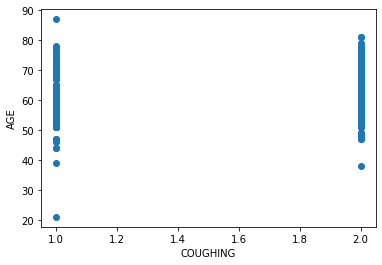

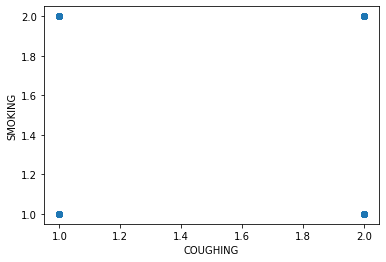

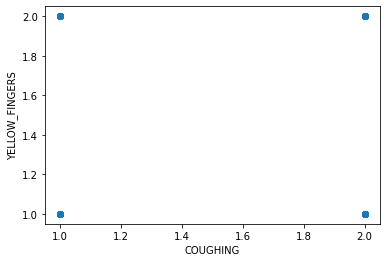

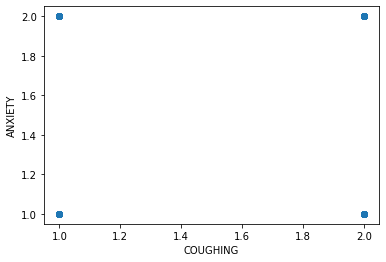

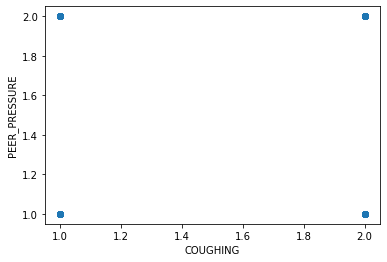

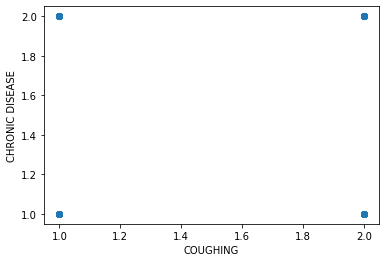

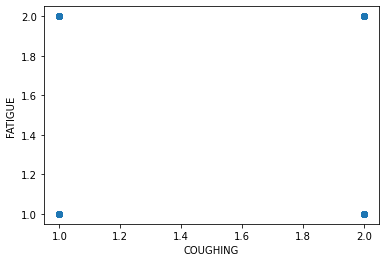

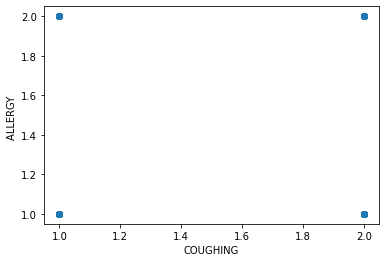

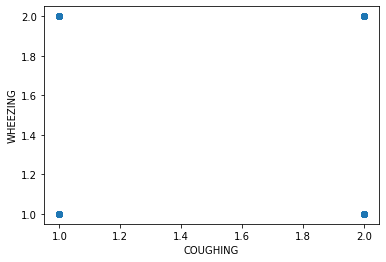

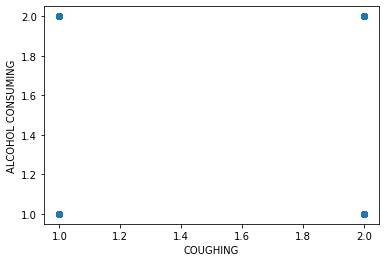

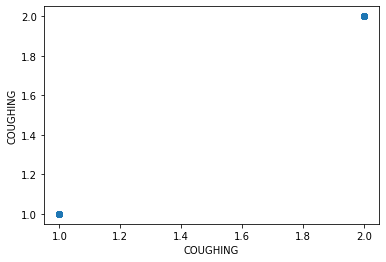

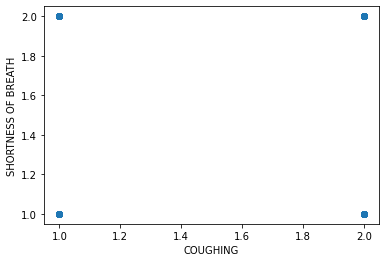

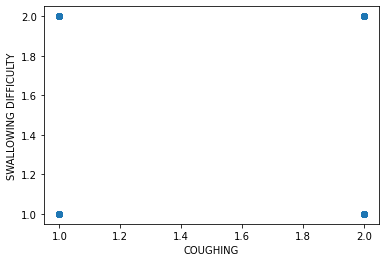

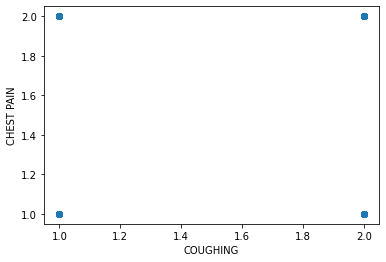

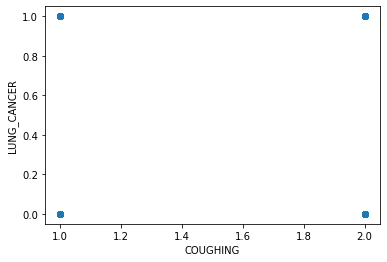

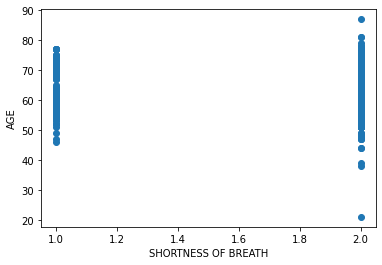

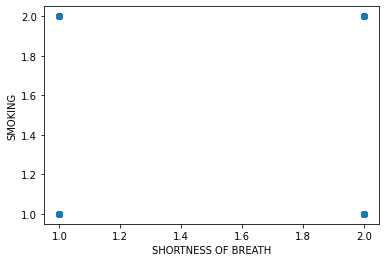

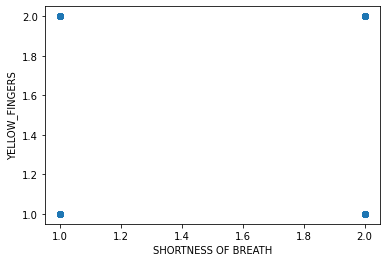

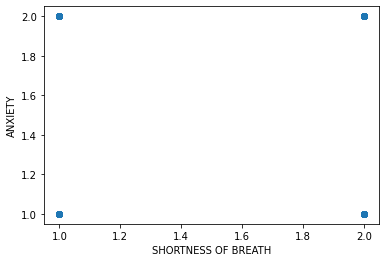

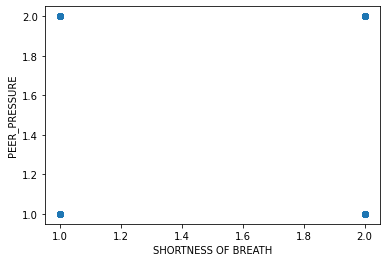

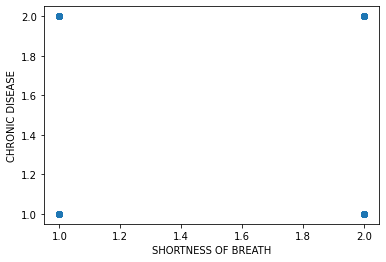

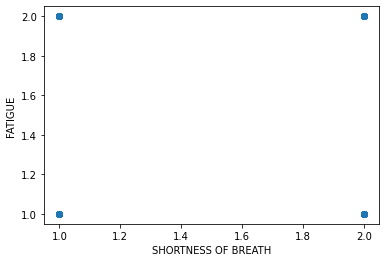

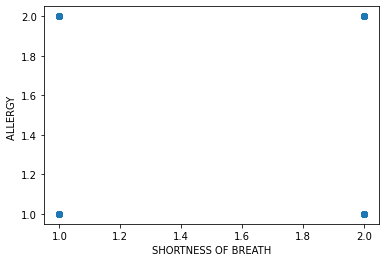

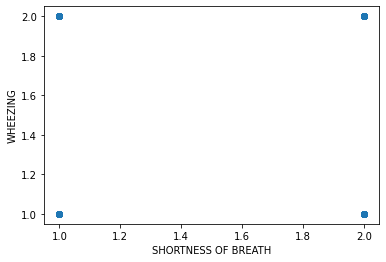

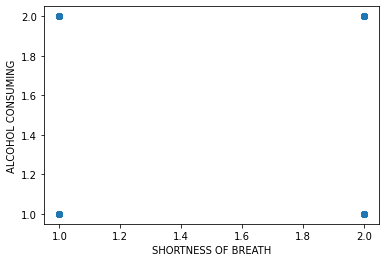

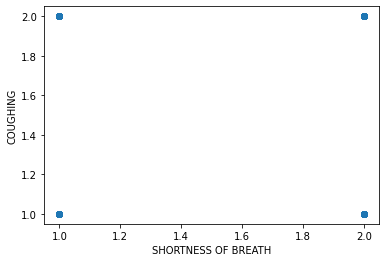

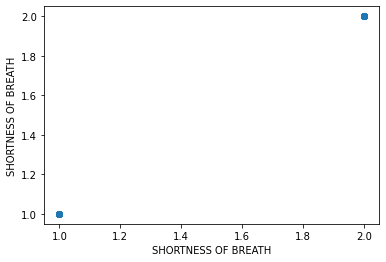

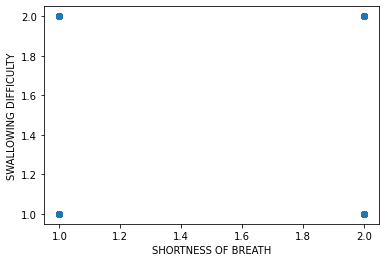

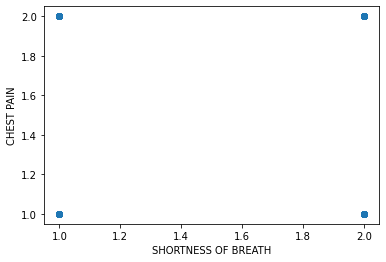

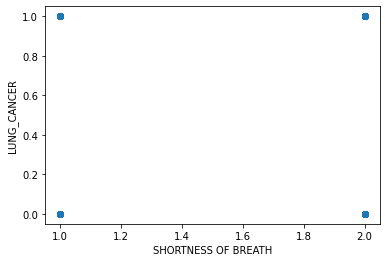

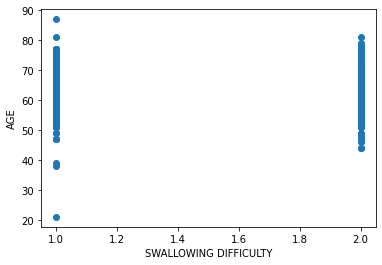

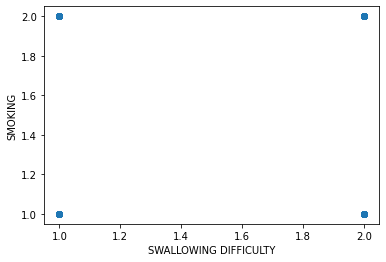

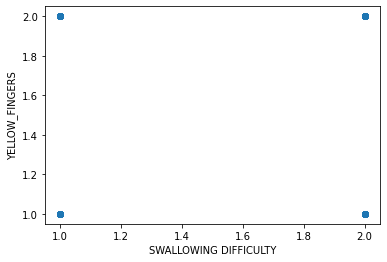

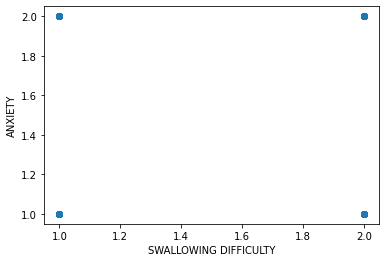

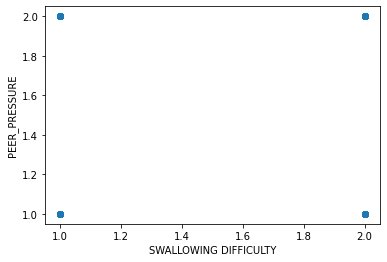

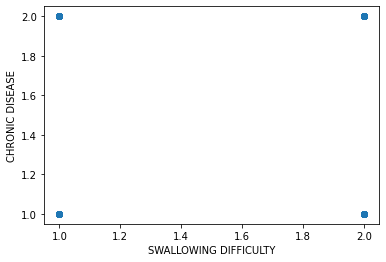

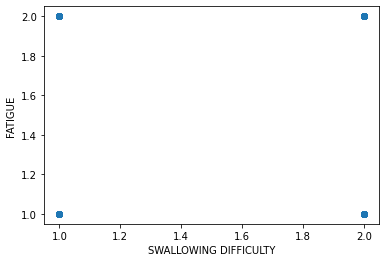

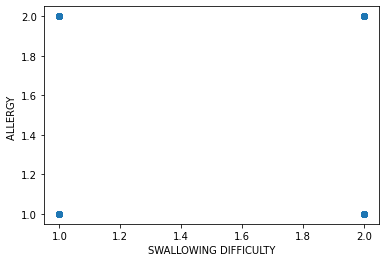

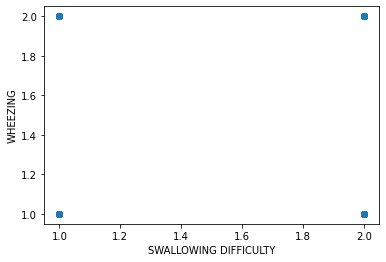

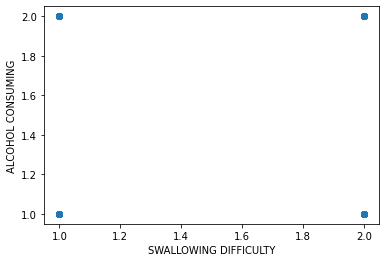

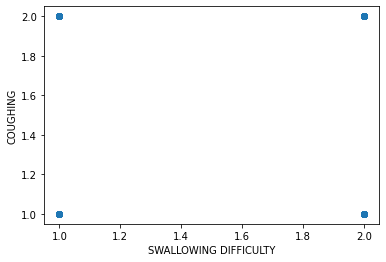

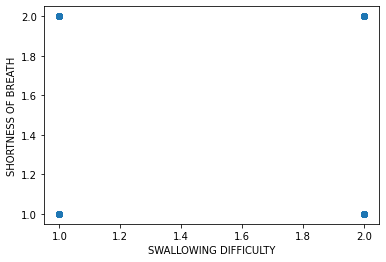

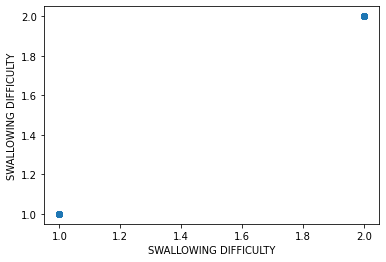

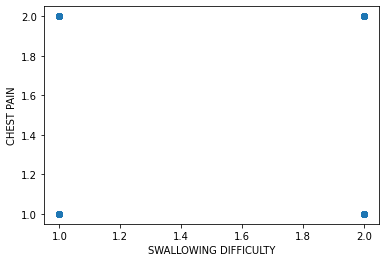

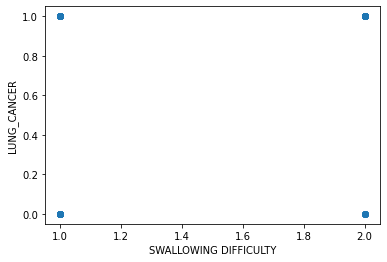

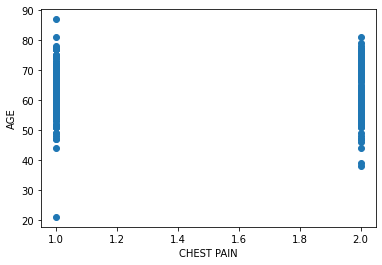

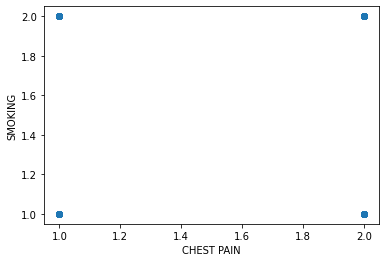

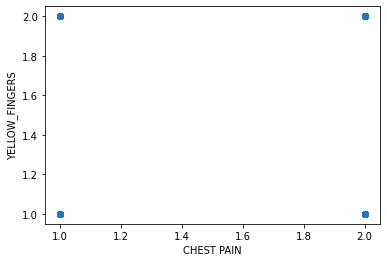

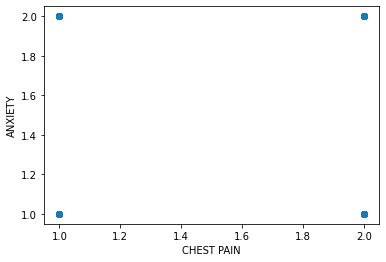

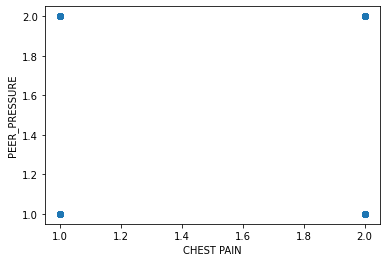

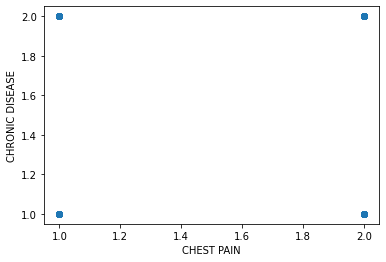

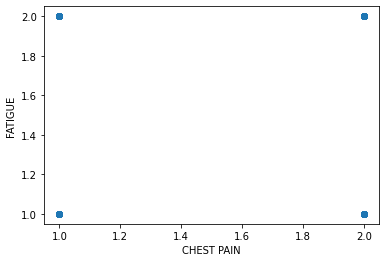

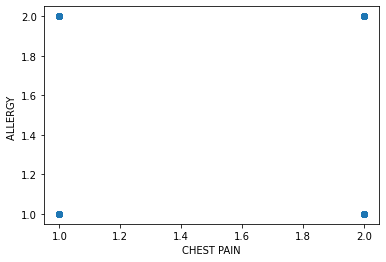

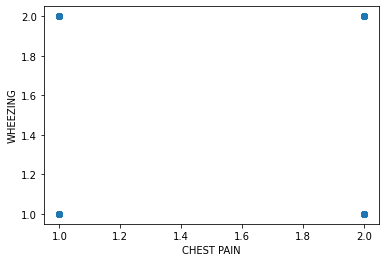

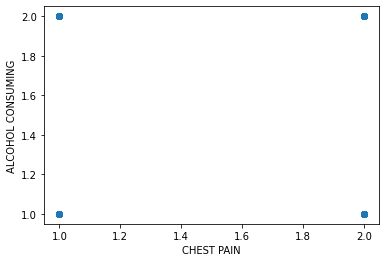

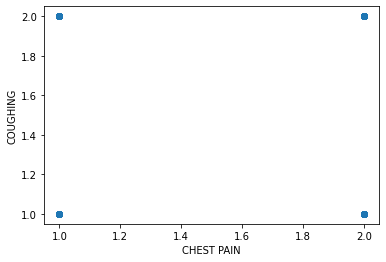

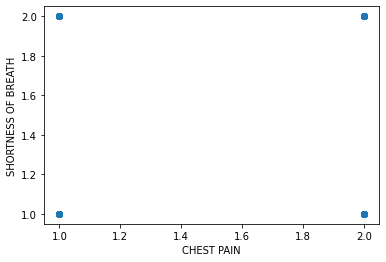

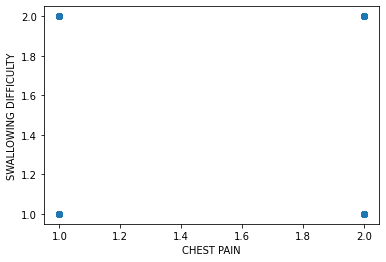

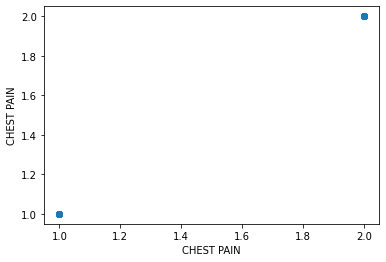

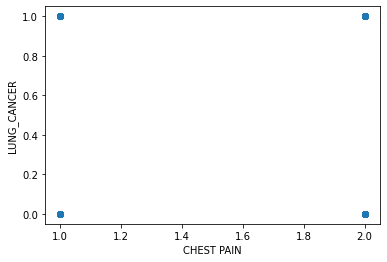

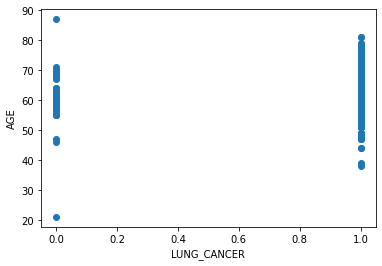

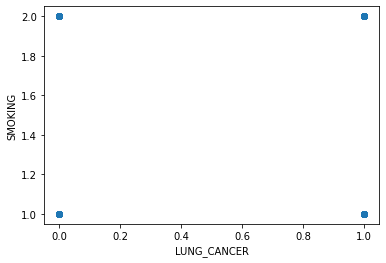

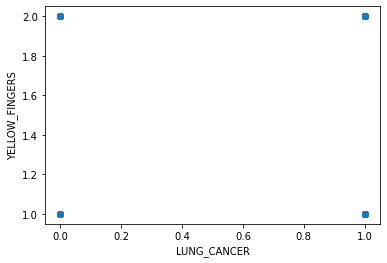

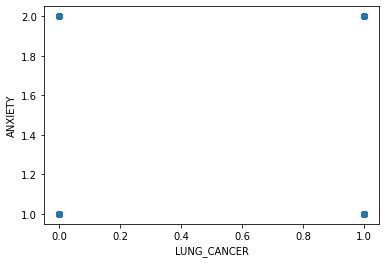

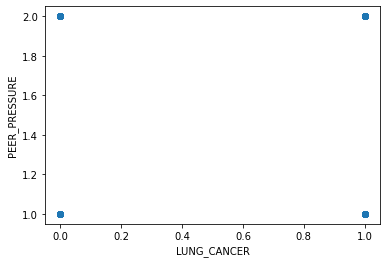

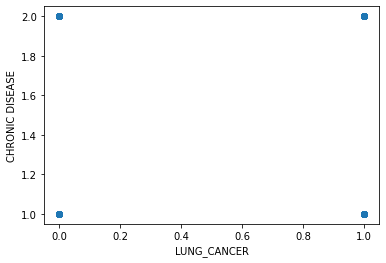

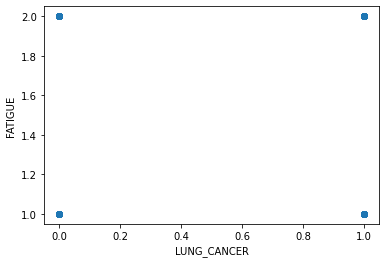

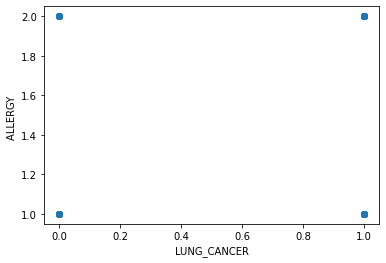

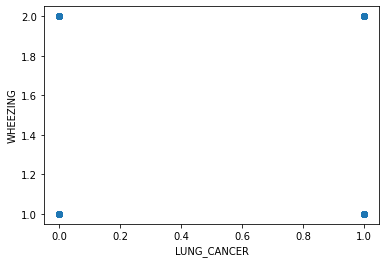

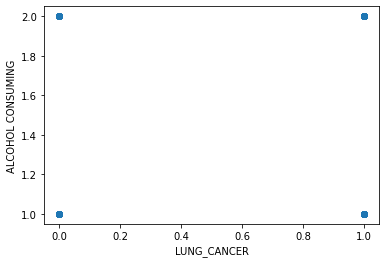

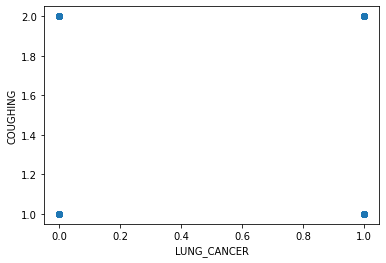

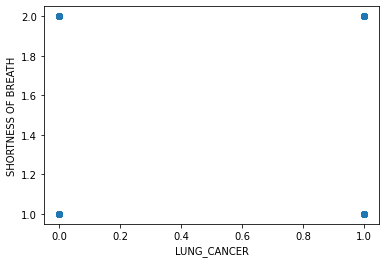

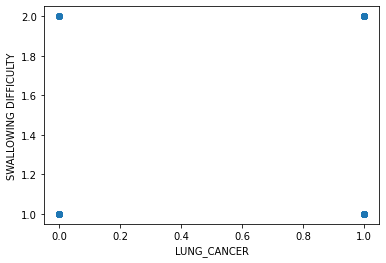

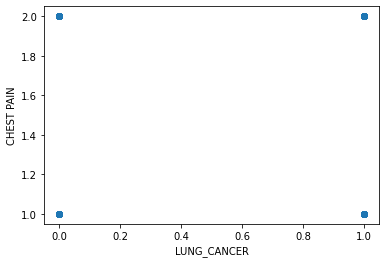

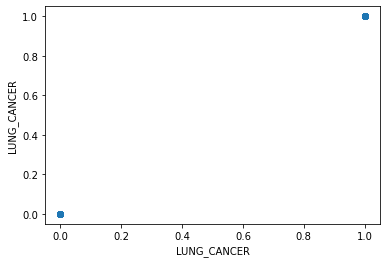

In [64]:
for col in df.columns:
    for col2 in df.columns[1:]:
        plt.scatter(df[col] , df[col2])
        plt.xlabel(col)
        plt.ylabel(col2)
        plt.show()

In [65]:
#sns.pairplot(df)

In [66]:
y= df['LUNG_CANCER']
X = df.drop('LUNG_CANCER' , axis =1)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()

In [69]:
X = sc.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split

In [242]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=100)

In [243]:
Scores=[]


In [244]:
sklearn.feature_selection

NameError: name 'sklearn' is not defined

# LogisticRegression

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
model = LogisticRegression()

In [247]:
model.fit(X_train , y_train)

LogisticRegression()

In [248]:
model.score( X_test , y_test)

0.9354838709677419

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


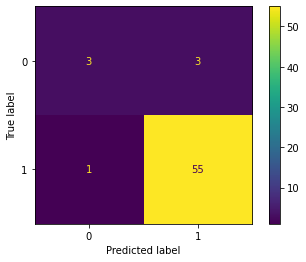

In [249]:
plot_confusion_matrix(model ,X_test,y_test)

# Decision Tree

In [250]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
DT = DecisionTreeClassifier()

In [252]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [253]:
decisionTreeScore =  DT.score( X_test , y_test)
Scores.append(decisionTreeScore)
decisionTreeScore

0.9354838709677419

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


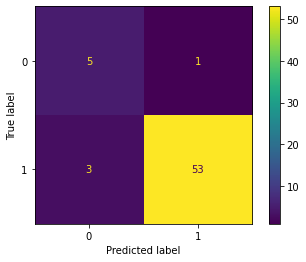

In [254]:
plot_confusion_matrix(DT ,X_test,y_test)

# K Nearest Neighbors

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
knn = KNeighborsClassifier(n_neighbors=5)

In [257]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [258]:
knnScore = knn.score( X_test , y_test)
Scores.append(knnScore)
knnScore

0.9032258064516129

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


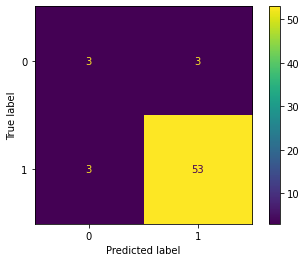

In [259]:
plot_confusion_matrix(knn ,X_test,y_test)

# Random forest

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [277]:
RF = RandomForestClassifier()

In [280]:
RF.feature_importances_

array([0.03474808, 0.2121426 , 0.03983584, 0.05720821, 0.05469331,
       0.07216309, 0.06601848, 0.05014999, 0.07533978, 0.04867345,
       0.08456371, 0.05606791, 0.04458375, 0.05429058, 0.04952122])

In [279]:
RF.fit(X_train , y_train )

RandomForestClassifier()

In [263]:
randomForestScore = RF.score(X_test , y_test)
Scores.append(randomForestScore)
randomForestScore

0.9516129032258065

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


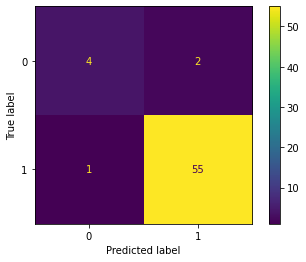

In [264]:
plot_confusion_matrix(RF ,X_test,y_test)

# K Means

In [265]:
from sklearn.cluster import KMeans

In [266]:
KMeans()

KMeans()

In [267]:
km = KMeans(n_clusters=2)

In [268]:
cluster_pred = km.fit_predict(df[['YELLOW_FINGERS' , 'AGE']])
cluster_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [269]:
kmeanScore = accuracy_score(cluster_pred , y)
Scores.append(kmeanScore)
kmeanScore

0.5728155339805825

In [270]:
Scores

[0.9354838709677419,
 0.9032258064516129,
 0.9516129032258065,
 0.5728155339805825]

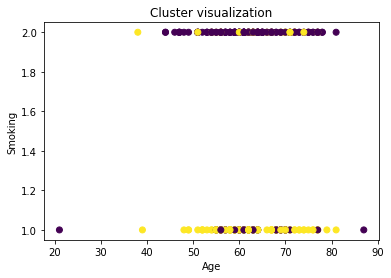

In [271]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

plt.scatter(df['AGE'], df['YELLOW_FINGERS'], c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Smoking')
plt.title('Cluster visualization')
plt.show()


Text(0, 0.5, 'Scores')

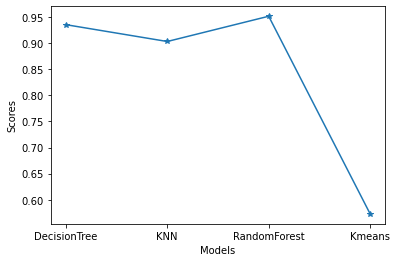

In [272]:
model_names = ['DecisionTree', 'KNN', 'RandomForest' , 'Kmeans']

plt.plot(Scores , marker ='*') 

plt.xticks(range(len(model_names)), model_names)

plt.xlabel('Models')
plt.ylabel('Scores')
